## Complete Text Processing
Dataset: https://www.kaggle.com/kazanova/sentiment140

![alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

In [0]:
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg

# General Feature Extraction
* File loading
* Word counts
* Characters count
* Average characters per word
* Stop words count
* Count #HashTags and @Mentions
* If numeric digits are presents in tweets
* Upper case word counts

# Preprocessing and Cleaning
* Lower case
* Contraction to Expansion
* Emails removal and counts
* URLs removal and counts
* Removal of **RT**
* Removal of Special Characters
* Removal of multiple spaces
* Removal of HTML tags
* Removal of accented characters
* Removal of Stop Words
* Conversion into base form of words
* Common occuring words Removal
* Rare occuring words removal
* Word Cloud
* Spelling correction
* Tokenization
* Lemmatization
* Detecting Entities using NER
* Noun Detection
* Language Detection
* Sentence Translation
* Using Inbuilt **Sentiment Classifier **

# Advanced text Processing and Feature Extraction
* N-Gram, Bi-Gram etc
* Bag of Words (BoW)
* Term Frequency Calculation `TF`
* Inverse Document Frequency `IDF`
* Term Frequency - Inverse Document Frequency `TFIDF`
* Word Embedding `Word2Vec` using SpaCy


# Machine Learning Models for Text Classification
* SGDClassifier
* LogisticRegression
* LogisticRegressionCV
* LinearSVC
* RandomForestClassifier

In [0]:
# libraries
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving twitter16m.csv to twitter16m.csv


In [6]:
# Load the data
df = pd.read_csv('twitter16m.csv', encoding = 'latin1', header = None)
df.head()
print(df.shape)

(1600000, 6)


In [0]:
df = df[[5, 0]]


In [8]:
df.columns = ['tweets', 'sentiment']
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
df['sentiment'].value_counts(dropna = False)

4    800000
0    800000
Name: sentiment, dtype: int64

In [0]:
## map sentiment column
sent_map = {0: 'negative', 1: 'positive'}

### Word Counts

In [0]:
## Apply lambda function row by row to split
df['word_count'] = df['tweets'].apply(lambda x: len(str(x).split())) # str -- because numeric column cannot be splitted

# check
df.head()

,tweets,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Characters Count

In [11]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x)) # length of each row is the no. of character
df.head()

,tweets,sentiment,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115
1,is upset that he can't update his Facebook by ...,0,111
2,@Kenichan I dived many times for the ball. Man...,0,89
3,my whole body feels itchy and like its on fire,0,47
4,"@nationwideclass no, it's not behaving at all....",0,111


### Average Word Length

In [0]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    
    return word_len/len(words) # len(x) / len(words)

In [13]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x)) # length of each row is the no. of character
df.head()

,tweets,sentiment,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115,5.052632
1,is upset that he can't update his Facebook by ...,0,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,89,3.944444
3,my whole body feels itchy and like its on fire,0,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714


In [14]:
## does not consider spaces, special characters
115/19

6.052631578947368

### Stop Words Count

In [15]:
print(STOP_WORDS)

{'can', 'has', 'both', 'does', 'move', 'he', 'down', 'moreover', 'name', 'she', 'had', 'since', 'where', 'myself', 'ourselves', 'regarding', 'these', 'without', 'him', "'ll", 'whose', 'within', 'mostly', 'on', "'m", 'anyone', 'would', 'could', 'amount', 'under', 'becomes', 'across', 'only', 'whatever', '’re', "'re", 'everyone', 'therefore', '‘m', 'will', 'during', 'were', 'almost', 'however', 'eight', 'her', '‘ll', 'fifty', 'or', 'anyhow', 'give', 'well', 'ten', '’s', 'when', 'his', 'afterwards', 'done', 'through', '‘ve', 'between', 'else', 'twenty', '‘d', 'whither', 'been', 'not', 'herein', 'herself', 'whenever', 'really', 'quite', 'thence', 'empty', 'out', 'already', 'at', 'thereupon', 'too', 'after', 'last', 'our', 'a', 'this', 'may', 're', 'together', 'up', 'eleven', 'much', 'noone', 'others', 'all', 'other', 'themselves', 'alone', 'often', 'make', 'fifteen', 'if', 'rather', 'beside', 'less', 'among', 'himself', 'nevertheless', 'put', 'wherein', "'s", 'latterly', 'yours', 'once', '

In [16]:
x = 'this is text data'
len([word for word in x.split() if word in STOP_WORDS])

2

In [17]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word in STOP_WORDS]))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714,10


### Count #HashTags and @Mentions

In [0]:
x = 'this is #hashtag and this is @mention'
# x = x.split()
# x

In [20]:
[word for word in x.split() if word.startswith('#')]
[word for word in x.split() if word.startswith('@')]

['@mention']

In [21]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))
df['mentions_count'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.startswith('@')]))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714,10,0,1


### Check for numeric digits present in tweets

In [22]:
df['numeric_count'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isdigit()]))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714,10,0,1,0


### Check for UPPER case words count

In [23]:
df['upper_count'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isupper() and len(x) > 3]))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714,10,0,1,0,1


In [24]:
## check some tweets
df.loc[0]['tweets']

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

## Data Preprocessing and Cleaning


### Lower case conversion

In [25]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,111,4.285714,10,0,1,0,1


### Contraction to Expansion

In [0]:
## Example:
x = "i don't know what you want, can't, he'll, i'd" ## don't -- contraction
## check wikipedia for list contractions

In [0]:
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [0]:
def cont_to_expa(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x    

In [201]:
## test converting contractions to expansion
x = "hi, I'd be happy"
x = cont_to_expa(x)
x


'hi, I would be happy'

In [30]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: cont_to_expa(x))
df.head()

CPU times: user 46.2 s, sys: 26.4 ms, total: 46.2 s
Wall time: 46.2 s


### Find, count and remove *Emails*

In [0]:
import re

In [0]:
## Example
x = 'hi my email me at email@email.com another@email.com'

In [33]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@email.com', 'another@email.com']

In [34]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,115,5.052632,4,0,1,0,1,[]
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,89,3.944444,7,0,1,0,1,[]
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it is not behaving at all...",0,111,4.285714,10,0,1,0,1,[]


In [35]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,111,4.285714,10,0,1,0,1,[],0


In [36]:
## get emails count > 0
print(df[df['emails_count'] > 0].shape)
df[df['emails_count'] > 0].head()

(564, 11)


,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [37]:
x

'hi my email me at email@email.com another@email.com'

In [38]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

'hi my email me at  '

In [0]:
### Remove emails from tweets

df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))


In [40]:
## checking emails are removed from tweets 
print(df[df['emails_count'] > 0].shape)
df[df['emails_count'] > 0].head()

(564, 11)


,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


### Count URLs and remove

In [0]:
## Example
x = 'hi, to watch more visit https://youtube.com/kgptalkie'

In [42]:
re.findall(r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', x)

['https://youtube.com/kgptalkie']

In [43]:
re.sub(r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', '', x)

'hi, to watch more visit '

In [44]:
df['urls_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', x)))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,111,4.285714,10,0,1,0,1,[],0,0


In [45]:
## Remove urls
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', '', x))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,111,4.285714,10,0,1,0,1,[],0,0


In [46]:
##
df.loc[0]['tweets']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### Remove RT - retweeting

In [0]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('RT', "", x))

### Special characters or punctuation removal

In [0]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [49]:
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,111,4.285714,10,0,1,0,1,[],0,0


### Remove multiple spaces `"hi    hello   "`

In [0]:
### Example
x = 'thanks     for watching .           and please  like this         video!!!'

In [51]:
" ".join(x.split())

'thanks for watching . and please like this video!!!'

In [52]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,111,4.285714,10,0,1,0,1,[],0,0


### Remove HTML tags

In [0]:
from bs4 import BeautifulSoup

In [0]:
x = '<html><h2>thanks for watching</h2></html>'

In [55]:
BeautifulSoup(x, 'lxml').get_text()

'thanks for watching'

In [56]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df.head()

CPU times: user 4min 19s, sys: 20.4 s, total: 4min 39s
Wall time: 4min 39s


In [57]:
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,111,4.285714,10,0,1,0,1,[],0,0


### Remove Accented Chars

In [0]:
import unicodedata

In [0]:
## Example
x = 'A'

In [0]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'igonore')
    return x

In [61]:
remove_accented_chars(x)

'A'

In [62]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: remove_accented_chars(x))
df.head()

CPU times: user 1.94 s, sys: 1.87 ms, total: 1.94 s
Wall time: 1.94 s


In [63]:
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,111,4.285714,10,0,1,0,1,[],0,0


## SpaCy and NLP

In [0]:
import spacy

### Remove Stop Words

In [0]:
## Example
x = 'this is stop words removal code'

In [66]:
" ".join([word for word in x.split() if word not in STOP_WORDS])

'stop words removal code'

In [67]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([word for word in x.split() if word not in STOP_WORDS]))
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving im mad,0,111,4.285714,10,0,1,0,1,[],0,0


### Convert into base or root form of word

In [0]:
## load the nlp library
nlp = spacy.load('en_core_web_sm')

In [0]:
## Example
x = 'kenichan dived times ball managed save 50 rest...'

In [70]:
nlp(x)

kenichan dived times ball managed save 50 rest...

In [0]:
# x = 'i you he she they is am are'

In [0]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))


In [73]:
make_to_base(x)

kenichan dive time ball manage save 50 rest ...


In [0]:
## lets apply to lambda to "tweets" column

# df['tweets'] = df['tweets'].apply(lambda x: make_to_base(x))
# df.head()

### common words removal

In [75]:
## this varies from project to project
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving im mad,0,111,4.285714,10,0,1,0,1,[],0,0


In [76]:
df.head()['tweets']

0    switchfoot - awww bummer shoulda got david car...
1    upset update facebook texting cry result schoo...
2    kenichan dived times ball managed save 50 rest...
3                           body feels itchy like fire
4                      nationwideclass behaving im mad
Name: tweets, dtype: object

In [77]:
' '.join(df.head()['tweets'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad'

In [0]:
text = ' '.join(df['tweets'])

In [0]:
## put text in pandas series
text = text.split()
freq_comm = pd.Series(text).value_counts()


In [80]:
freq_comm[:20]

im        178270
good       89366
day        82299
like       77735
-          69661
today      64512
going      64078
love       63421
work       62804
got        60749
time       56081
lol        55094
u          52833
know       51172
want       42070
new        41995
think      41040
night      41029
amp        40616
thanks     39311
dtype: int64

In [0]:
f20 = freq_comm[:20]

In [0]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([word for word in x.split() if word not in f20]))

### Rare words removal

In [83]:

# rare = freq_comm[freq_comm.values == 1]
rare20 = freq_comm[-20:]
rare20

mdavi86           1
downseriously     1
yogaee            1
post-kws          1
hallowhedon       1
vividshivers      1
super-tired       1
jackfm            1
kayahsworkin      1
hananan           1
bee-yotch         1
hurtbad           1
goodneeds         1
mindlet           1
ianabanana        1
daftatom          1
sarahlouiseoxo    1
yayamoriarty      1
veintitres        1
ooohnever         1
dtype: int64

In [0]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare20]))

In [85]:
df.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,111,4.285714,10,0,1,0,1,[],0,0


### Word Cloud Visualization

In [0]:
# !pip install wordcloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
print(len(text))
x = ' '.join(text[:20000])


11036687


In [0]:
## 

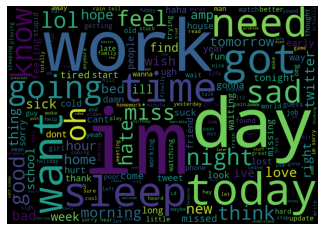

In [90]:
wc = WordCloud(width = 1000, height = 700).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction

In [0]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [0]:
from textblob import TextBlob

In [0]:
## Example
x = 'tanks forr watching this vidio carr'

In [0]:
x = TextBlob(x).correct()
## Note: not that perfect

In [95]:
x

TextBlob("tanks for watching this video care")

### Tokenization

In [0]:
# Example
x = 'thanks#watching for watching this video. please like it'

In [97]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [98]:
TextBlob(x).words

WordList(['thanks', 'watching', 'for', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [99]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
for
watching
this
video
.
please
like
it


### Lemmatization

In [0]:
x = 'runs run running ran'


In [0]:
from textblob import Word

In [102]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [103]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [104]:
## spacy
doc = nlp(x)
for token in doc:
    print(token.lemma_)

## Note: Better result

run
run
run
run


### Detecting Entities using NER of SpaCy

In [0]:
x = "For three years in a row, the number of new foreign students enrolling in American universities has fallen. In the 2015-16 academic year, 300,743 new foreign students enrolled. That number dropped to 269,383 in 2018-19, a decline of 10.4 percent as per the data of Open Doors, the Institute of International Education's (IIE) annual report that tracks university enrollments. Nor is the situation likely to improve in the academic year currently underway given that a snapshot survey of 500 universities by the IIE this fall found declining enrollment — although full stats won't be available until later in 2020"

In [106]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

three years in a row - DATE - Absolute or relative dates or periods
American - NORP - Nationalities or religious or political groups
2015-16 academic year - DATE - Absolute or relative dates or periods
300,743 - CARDINAL - Numerals that do not fall under another type
269,383 - CARDINAL - Numerals that do not fall under another type
2018-19 - DATE - Absolute or relative dates or periods
10.4 percent - PERCENT - Percentage, including "%"
the Institute of International Education's - ORG - Companies, agencies, institutions, etc.
annual - DATE - Absolute or relative dates or periods
the academic year - DATE - Absolute or relative dates or periods
500 - CARDINAL - Numerals that do not fall under another type
IIE - ORG - Companies, agencies, institutions, etc.
later in 2020 - TIME - Times smaller than a day


In [0]:
# visualization
from spacy import displacy

In [108]:
displacy.render(doc, style = 'ent', jupyter=True)

### Detecting Nouns

In [109]:
x

"For three years in a row, the number of new foreign students enrolling in American universities has fallen. In the 2015-16 academic year, 300,743 new foreign students enrolled. That number dropped to 269,383 in 2018-19, a decline of 10.4 percent as per the data of Open Doors, the Institute of International Education's (IIE) annual report that tracks university enrollments. Nor is the situation likely to improve in the academic year currently underway given that a snapshot survey of 500 universities by the IIE this fall found declining enrollment — although full stats won't be available until later in 2020"

In [110]:
for noun in doc.noun_chunks:
    print(noun)

three years
a row
the number
new foreign students
American universities
the 2015-16 academic year
300,743 new foreign students
That number
10.4 percent
the data
Open Doors
International Education
(IIE
annual report
university enrollments
the situation
the academic year
a snapshot survey
500 universities
the IIE
declining enrollment
full stats


### Translation and Language Detection
Language code:
https://www.loc.gov/standards/iso639-2/php/code_list.php

In [0]:
tb = TextBlob(x)

In [112]:
tb.detect_language()

'en'

In [113]:
## translate into chinese language
tb.translate(to='ne')

TextBlob("लगातार तीन बर्षसम्म अमेरिकी विश्वविद्यालयमा भर्ना हुने नयाँ विदेशी विद्यार्थीहरूको संख्या घटेको छ। २०१-16-१-16 शैक्षिक वर्षमा ,००,7433 नयाँ विदेशी विद्यार्थी भर्ना भए। उक्त संख्या २०१ 2018-१-19 मा २ 26,, 8383। मा झरेको छ, खुला ढोकाको तथ्यांक अनुसार १०..4 प्रतिशतले गिरावट आएको छ, विश्वविद्यालयको नामांकन ट्र्याक गर्ने अन्तर्राष्ट्रिय शिक्षा संस्थानको (आईआईई) वार्षिक रिपोर्ट। न त शैक्षिक वर्षमा हालको स्थितिमा सुधार हुने सम्भावना रहेको छ किनकि आईआईईले fall०० विश्वविद्यालयको स्न्यापशट सर्वेक्षणले यो गिरावट घटाएको पाएको छ - यद्यपि पूर्ण तथ्या 20्क २०२० सम्म पछि उपलब्ध हुने छैन।")

### Use unbuilt sentiment classifier

In [0]:
from textblob.sentiments import NaiveBayesAnalyzer

In [0]:
x = 'we all stands together to fight with corona virus. we will win together'

In [0]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())


In [0]:
# import nltk
# nltk.download('movie_reviews')

In [118]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [0]:
x = 'we all are suffering from corona virus.'

In [0]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())


In [121]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.7493872044639974, p_neg=0.25061279553600196)

In [0]:
### Note: Always train your own classifier

## Advanced Text Processing

### N-Grams

In [0]:
x = 'thanks for watching'

In [0]:
tb = TextBlob(x)

In [125]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

### Bag of Words - BoW

In [0]:
x = ['this is first sentence', 'this is second', 'this is last']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [129]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [130]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [131]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [132]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### Term Frequency
`Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.`


In [133]:
x

['this is first sentence', 'this is second', 'this is last']

In [134]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [135]:
print(bow.shape)
print(bow.shape[0])
print(bow.shape[1])

(3, 6)
3
6


In [0]:
TF = bow.copy()

In [137]:
for index, row in enumerate(TF.iterrows()):
    for col in row[1].index:
        TF.loc[index, col] = TF.loc[index, col]/sum(row[1].values)

TF

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


### Inverse Document Frequency - IDF

idf is computed as $idf(t) = log [ \frac{n}{df(t)} ] + 1$ , (if smooth_idf=False)



In [0]:
import numpy as np

In [139]:
x_df = pd.DataFrame(x, columns=['words'])
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [140]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [141]:
N = bow.shape[0]
N

3

In [142]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [143]:
bb['first'].sum()

1

In [144]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [0]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [146]:
nz

[1, 3, 1, 1, 1, 3]

In [147]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1) / (nz[index] + 1)) + 1)

idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(x_df['words'])
X_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [150]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [151]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word Embeddings

- SpaCy `Word2vec`



In [160]:
!python -m spacy download en_core_web_lg
# import spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [161]:
nlp = spacy.load('en_core_web_lg')

OSError: ignored

In [0]:
doc = nlp('thank you! dog cat lion dfasaa')

In [163]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa True


In [164]:
token.vector.shape

(96,)

In [165]:
nlp('cat').vector.shape

(96,)

In [0]:
# for token1 in doc:
#     for token2 in doc:
#         print(token1.text, token2.text, token1.similarity(token2))
#     print()

## Machine Learning Model for Text Classification

### BoW

In [167]:
df.shape

(1600000, 12)

In [0]:
df0 = df[df['sentiment'] == 0].sample(2000)
df4 = df[df['sentiment'] == 4].sample(2000)

In [0]:
dfr =  df0.append(df4)

In [170]:
dfr.shape

(4000, 12)

In [171]:
dfr.head()

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
634030,jessicaohyeah joe jonas girlfriend sad,0,72,5.000000,4,0,1,0,1,[],0,0
499878,donniewahlbergs twitter makes sad,0,53,6.285714,2,0,1,0,0,[],0,0
776713,itsthelighting miss shelly,0,30,6.500000,1,0,1,0,0,[],0,0
255587,sedroknits exactly boat assignments week week ...,0,124,4.636364,11,0,1,0,0,[],0,0
463534,aww puppy quit crying,0,32,4.333333,1,0,0,0,0,[],0,0


In [172]:
dfr_feat = dfr.drop(labels=['tweets', 'sentiment', 'emails'], axis = 1).reset_index(drop = True)
dfr_feat.head()

,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,72,5.000000,4,0,1,0,1,0,0
1,53,6.285714,2,0,1,0,0,0,0
2,30,6.500000,1,0,1,0,0,0,0
3,124,4.636364,11,0,1,0,0,0,0
4,32,4.333333,1,0,0,0,0,0,0


In [173]:
y = dfr['sentiment']
y.head()

634030    0
499878    0
776713    0
255587    0
463534    0
Name: sentiment, dtype: int64

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [175]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['tweets'])
text_counts

<4000x9749 sparse matrix of type '<class 'numpy.int64'>'
	with 23861 stored elements in Compressed Sparse Row format>

In [176]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [177]:
text_counts.toarray().shape

(4000, 9749)

In [178]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
dfr_bow.head()

,0128,02,050,08,09,0helenka,0riginalh,10,100,1000,10000,1000000,10000x,100th,1015,102,1040,1050,10am,10days,10pm,10th,10yr,11,110,1100000000,1111,1115pm,112,1130,11th,12,1200,1245,12am,12marathon,13,130am,13hour,14,...,yu,yuck,yuckjust,yuckk,yuducom,yuk,yukky,yum,yummm,yummy,yummy411,yup,yupi,yuu,yuuus,yy,yyyy,yznw,zach,zachary,zackerybinxx,zammi,zarhooie,zebr0,zeet75,zeina,zillion,zinedistro,zipia,zirracus,zone,zoo,zoom,zoos,zor,zs,ztratila,zune,zz,zztzed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ML Algorithms

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [0]:
sgd = SGDClassifier(n_jobs = -1, random_state = 42, max_iter = 200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 5, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [0]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [182]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [183]:
clf.values()

dict_values([SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty

In [0]:
##


def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ----> ", ac)

In [185]:
%%time

classify(dfr_bow, y)

SGD  ---->  0.67
LGR  ---->  0.70625
LGR-CV  ---->  0.71
SVM  ---->  0.69125
RFC  ---->  0.64
CPU times: user 5min 20s, sys: 8.82 s, total: 5min 28s
Wall time: 2min 48s


#### Manual Features

In [186]:
dfr_feat.head(3)

,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,72,5.000000,4,0,1,0,1,0,0
1,53,6.285714,2,0,1,0,0,0,0
2,30,6.500000,1,0,1,0,0,0,0


In [187]:
%%time
classify(dfr_feat, y)

SGD  ---->  0.62125
LGR  ---->  0.61625
LGR-CV  ---->  0.61125
SVM  ---->  0.61375
RFC  ---->  0.5225
CPU times: user 2.37 s, sys: 706 ms, total: 3.08 s
Wall time: 1.77 s


### Manual + Bow

In [188]:
X = dfr_feat.join(dfr_bow)
X.head()

,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails_count,urls_flag,0128,02,050,08,09,0helenka,0riginalh,10,100,1000,10000,1000000,10000x,100th,1015,102,1040,1050,10am,10days,10pm,10th,10yr,11,110,1100000000,1111,1115pm,112,1130,11th,...,yu,yuck,yuckjust,yuckk,yuducom,yuk,yukky,yum,yummm,yummy,yummy411,yup,yupi,yuu,yuuus,yy,yyyy,yznw,zach,zachary,zackerybinxx,zammi,zarhooie,zebr0,zeet75,zeina,zillion,zinedistro,zipia,zirracus,zone,zoo,zoom,zoos,zor,zs,ztratila,zune,zz,zztzed
0,72,5.000000,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53,6.285714,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30,6.500000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,124,4.636364,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,32,4.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
%%time
classify(X, y)

SGD  ---->  0.68625
LGR  ---->  0.70875
LGR-CV  ---->  0.69875
SVM  ---->  0.70375
RFC  ---->  0.66
CPU times: user 5min 6s, sys: 10.1 s, total: 5min 16s
Wall time: 2min 42s


### TF-IFD

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
dfr.shape

(4000, 12)

In [0]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [193]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD  ---->  0.66125
LGR  ---->  0.705
LGR-CV  ---->  0.71125
SVM  ---->  0.68
RFC  ---->  0.64625
CPU times: user 4min 51s, sys: 6.94 s, total: 4min 58s
Wall time: 2min 32s


### Word2Vec

In [0]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [195]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

CPU times: user 34.3 s, sys: 25.6 ms, total: 34.3 s
Wall time: 34.3 s


In [196]:
dfr.head(3)

,tweets,sentiment,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag,vec
634030,jessicaohyeah joe jonas girlfriend sad,0,72,5.000000,4,0,1,0,1,[],0,0,"[[0.5883233, -0.9804615, -0.9133175, 0.2974658..."
499878,donniewahlbergs twitter makes sad,0,53,6.285714,2,0,1,0,0,[],0,0,"[[0.4356315, -0.92796755, -2.3046646, 0.006997..."
776713,itsthelighting miss shelly,0,30,6.500000,1,0,1,0,0,[],0,0,"[[1.0128542, -0.8560643, -1.3142549, 0.2259688..."


In [197]:
X = dfr['vec'].to_numpy()
X.shape

(4000,)

In [0]:
# X

In [200]:
X = np.concatenate(X, axis = 0)

ValueError: ignored

In [0]:
X.shape